In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import display, Latex

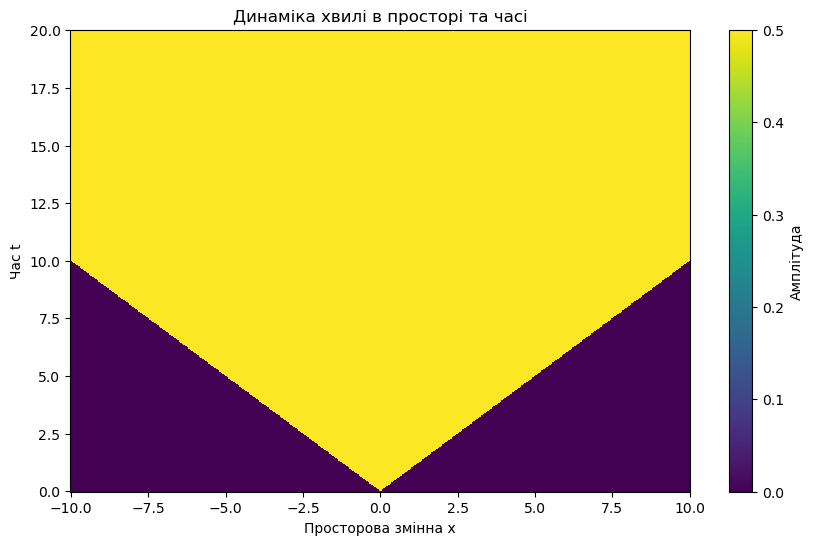

In [2]:
def heaviside(t):
    return np.piecewise(t, [t <= 0, t > 0], [0, 1])

def wave_equation(x, t, c):
    r = np.abs(x)
    signal_start_time = r / c
    h = heaviside(t - signal_start_time)
    return h / (2 * c)

# Параметри моделі
c = 1.0  # Швидкість поширення хвилі

# Просторові та часові параметри
x_values = np.linspace(-10, 10, 400)
t_values = np.linspace(0, 20, 400)

# Створення 2D-мешу для x та t
x, t = np.meshgrid(x_values, t_values)

# Обчислення значень хвильової функції
wave_values = wave_equation(x, t, c)

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.pcolormesh(x, t, wave_values, cmap='viridis')
plt.colorbar(label='Амплітуда')
plt.title('Динаміка хвилі в просторі та часі')
plt.xlabel('Просторова змінна x')
plt.ylabel('Час t')
plt.show()